# 지도학습 회귀 미리보기

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 농어 무게 예측하기
- k-최근접이웃 회귀모델을 통해 길이값으로 무게 예측

In [31]:
# 데이터 준비
# - 압력: 길이
# - 라벨(정답) : 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
perch_length.shape,perch_weight.shape

((56,), (56,))

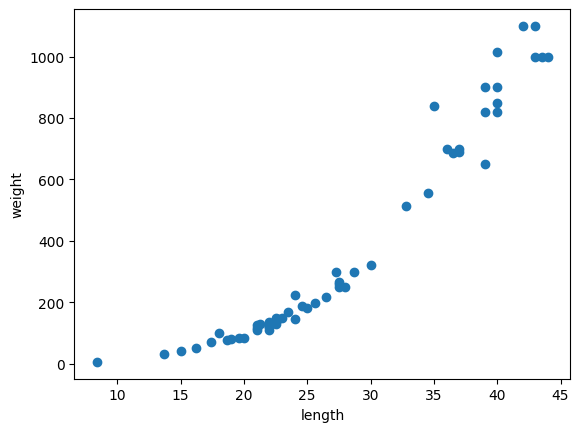

In [32]:
# 데이터 시각화
plt.scatter(perch_length,perch_weight)
# plt.xlim(0,1500)
# plt.ylim(0,1500)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [33]:
# 훈련 - 테스트 데이터 분리
from sklearn.model_selection import train_test_split

train_input,test_input,train_label,test_label = train_test_split(
    perch_length,perch_weight,random_state=42
)

train_input.shape,test_input.shape,train_label.shape,test_label.shape

((42,), (14,), (42,), (14,))

In [34]:
# 배치 차원 추가
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input.shape,test_input.shape

((42, 1), (14, 1))

##### 훈련

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
# 훈련
knr.fit(train_input,train_label)

KNeighborsRegressor()

##### 평가 - 결정계수 $R^2$
$$
    결정계수 = 1 - \frac{(실제값-예측)^2의 합}{(실제값-평균)^2의 합}
$$

- 0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 뜻

In [36]:
# 평가
knr.score(test_input,test_label)

0.992809406101064

##### 예측

In [37]:
pred = knr.predict([[30]])
pred

array([311.4])

In [38]:
distances,indexes = knr.kneighbors([[30]])
distances,indexes

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [39]:
# 최근접 이웃 5개 무게 값의 평균치
train_label[indexes].mean()

np.float64(311.4)

##### 최근접 이웃 모델의 한계
- 메모리에 로드된 데이터포인트만 대사응로 예측하므로 한계점에서 취약
- 용량이 큰 데이터를 메모리에 로드하는 것도 문제

In [40]:
knr.predict([[50],[100]])

array([1010., 1010.])

### 선형회귀 모델

- 속성에 따라 회귀 계수와 절편을 학습하고, 이를 통해 예측

**컬럼이 하나인 경우**
$y = wx +b$
1. 회귀 계수 (= 기울기,가중치,weight,coefficient)
2. 절편 ( = 편향,bias,intercept)

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_label)

LinearRegression()

In [42]:
# 회귀계수,절편
lr.coef_,lr.intercept_

(array([39.01714496]), np.float64(-709.0186449535477))

In [43]:
# 예측값 직접 계산
w = lr.coef_
b = lr.intercept_
x = np.array([50,100])

# y = w*x + b
w*x+b

array([1241.83860323, 3192.69585141])

In [44]:
# 모델을 통한 예측
lr.predict([[50],[100]])

array([1241.83860323, 3192.69585141])

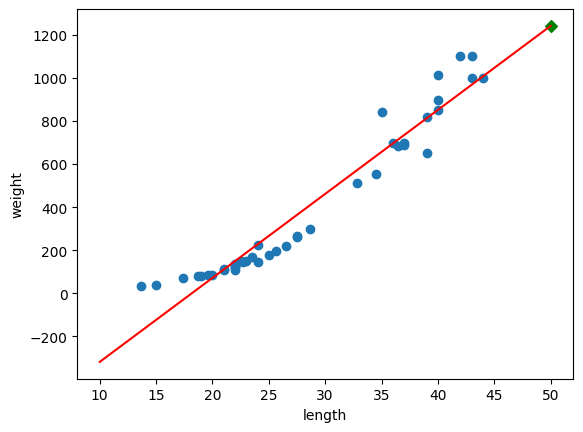

In [45]:
# 시각화
plt.scatter(train_input,train_label)
plt.plot([10,50],[w*10+b,w*50+b],color='red')
plt.scatter(50,w*50+b,color='green',marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [46]:
# 평가
lr.score(test_input,test_label)

0.8247503123313559

**컬럼이 여러 개인 경우**
$ y = w_1x_1+w_2x_2 + w_3x_3 + ... + b$
1. 회귀 계수 여러 개
2. 절편 한개

In [47]:
perch_df = pd.read_csv('./data/perch_full.csv',encoding='utf-8')
perch_df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [48]:
# 입력 데이터
perch_full = perch_df.to_numpy()
perch_full.shape

(56, 3)

In [49]:
# 라벨 데이터 
perch_weight.shape

(56,)

In [50]:
train_input,test_input,train_label,test_label= train_test_split(perch_full,perch_weight,random_state=42)
train_input.shape,test_input.shape,train_label.shape,test_label.shape

((42, 3), (14, 3), (42,), (14,))

In [51]:
# 훈련
lr = LinearRegression()
lr.fit(train_input,train_label)

LinearRegression()

In [66]:
# 가중치, 절편 -> 직접 계산
w1,w2,w3=lr.coef_
b = lr.intercept_
# 예측
x1,x2,x3 = 20.0,5.08,2.77
w1*x1+w2*x2+w3*x3+b

np.float64(40.48469883355233)

In [67]:
# 모델을 통한 예측
lr.predict([[20.0,5.08,2.77]])

array([40.48469883])

In [69]:
# 평가
lr.score(test_input,test_label), lr.score(train_input,train_label)

(0.8796419177546368, 0.9559326821885706)

### 특성 공학 (Feature Engineering)
- 기계학습 성능 향상을 위해 기존 데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리
    - 특성 생성
    - 특성 변환
    - 결측치 처리
    - 차원 축소
    - 범주형 데이터 처리 (인코딩)


In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False,degree=3)
poly.fit([[4,5]])
poly.transform([[4,5]])


array([[  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [85]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [129]:
# 농어 데이터 특성 추가
poly = PolynomialFeatures(include_bias=False,degree=2)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
poly_perch

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.370000e+01, 3.530000e+00, 2.000000e+00, 1.876900e+02,
        4.836100e+01, 2.740000e+01, 1.246090e+01, 7.060000e+00,
        4.000000e+00],
       [1.500000e+01, 3.820000e+00, 2.430000e+00, 2.250000e+02,
        5.730000e+01, 3.645000e+01, 1.459240e+01, 9.282600e+00,
        5.904900e+00],
       [1.620000e+01, 4.590000e+00, 2.630000e+00, 2.624400e+02,
        7.435800e+01, 4.260600e+01, 2.106810e+01, 1.207170e+01,
        6.916900e+00],
       [1.740000e+01, 4.590000e+00, 2.940000e+00, 3.027600e+02,
        7.986600e+01, 5.115600e+01, 2.106810e+01, 1.349460e+01,
        8.643600e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [1.870000e+01, 5.200000e+00, 3.120000e+00, 3.496900e+02,
        9.724000e+01, 5.834400

In [130]:
# 훈련 - 테스트 데이터 분리
train_input,test_input,train_label,test_label = train_test_split(poly_perch,perch_weight,random_state=42)
train_input.shape,test_input.shape,train_label.shape,test_label.shape

((42, 9), (14, 9), (42,), (14,))

In [131]:
# 훈련
lr = LinearRegression()
lr.fit(train_input,train_label)

LinearRegression()

In [133]:
# 평가
lr.score(test_input,test_label), lr.score(train_input,train_label)

(0.9714559911594159, 0.9903183436982124)

##### 특성을 5차까지 늘려보기

In [147]:
transformer = PolynomialFeatures(include_bias=False,degree=3)
poly_perch = transformer.fit_transform(perch_full)
poly_perch.shape
# 훈련 - 테스트 데이터 분리
train_input,test_input,train_label,test_label = train_test_split(poly_perch,perch_weight,random_state=42)
train_input.shape,test_input.shape,train_label.shape,test_label.shape
# 훈련
lr = LinearRegression()
lr.fit(train_input,train_label)
# 평가
lr.score(test_input,test_label), lr.score(train_input,train_label)

(0.9410534492226834, 0.9963872340980076)

In [148]:
transformer = PolynomialFeatures(include_bias=False,degree=4)
poly_perch = transformer.fit_transform(perch_full)
poly_perch.shape
# 훈련 - 테스트 데이터 분리
train_input,test_input,train_label,test_label = train_test_split(poly_perch,perch_weight,random_state=42)
train_input.shape,test_input.shape,train_label.shape,test_label.shape
# 훈련
lr = LinearRegression()
lr.fit(train_input,train_label)
# 평가
lr.score(test_input,test_label), lr.score(train_input,train_label)

(-6.786696888768629, 0.9995286898075306)

In [149]:
transformer = PolynomialFeatures(include_bias=False,degree=5)
poly_perch = transformer.fit_transform(perch_full)
poly_perch.shape
# 훈련 - 테스트 데이터 분리
train_input,test_input,train_label,test_label = train_test_split(poly_perch,perch_weight,random_state=42)
train_input.shape,test_input.shape,train_label.shape,test_label.shape
# 훈련
lr = LinearRegression()
lr.fit(train_input,train_label)
# 평가
lr.score(test_input,test_label), lr.score(train_input,train_label)

(-144.4051193329733, 0.9999999999997811)

In [152]:
def polynomial_regression(degree):
    transformer = PolynomialFeatures(include_bias=False,degree=degree)
    poly_perch = transformer.fit_transform(perch_full)
    train_input,test_input,train_label,test_label = train_test_split(poly_perch,perch_weight,random_state=42)
    lr = LinearRegression()
    lr.fit(train_input,train_label)
    return lr.score(train_input,train_label),lr.score(test_input,test_label)

for i in range(2,6):
    print(polynomial_regression(i))

(0.9903183436982124, 0.9714559911594159)
(0.9963872340980076, 0.9410534492226834)
(0.9995286898075306, -6.786696888768629)
(0.9999999999997811, -144.4051193329733)


### 과대 적합
**과대적합 (overfitting)**
- 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화 되지 않은 상태
- 훈련 데이터에 대한 평가는 좋지만 테스트 데이터에 대한 평가가 떨어지는 상태
- 훈련 데이터의 잡음까지 학습된 상태
- 해결 방법
    - 데이터셋의 복잡도 줄이기
    - 학습할 데이터의 양을 늘리기
    - L1, L2가 적용된 규제 모델 사용하기

**과소적합 (underfitting)**
- 모델 훈련이 덜 된 상태
- 속성을 제대로 분석하지 못한 상태
- 훈련 데이터에 대한 평가조차 좋지 않은 상태
- 해결 방법
    - 학습할 데이터를 추가 제공하기
    - 특성을 추가해 복잡한 패턴을 학습시키기